In [1]:
from urllib.request import urlopen
import io
import requests
import pandas as pd
import webbrowser
from PyPDF2 import PdfReader, PdfWriter

In [2]:
from wdtools import *

In [3]:
pdf_path = r'L:\NaturalResources\Wetlands\Local Wetland Inventory\WAPO\EPA_2022_Tasks\Task 1 WD Mapping'
pdf_outpath = fr'{pdf_path}\output\pdf'
revpath = r'L:\NaturalResources\Wetlands\Local Wetland Inventory\WAPO\EPA_2022_Tasks\Task 1 WD Mapping\output\to_review'

In [83]:
#setID = 'Set002'; nm_to_add=1420
#setID = 'Set003'; nm_to_add = 2143
#setID = 'Set004'; nm_to_add = 2878
#setID = 'Set005'; nm_to_add = 3932
#setID = 'Set006'; nm_to_add = 4370
#setID = 'Set007'; nm_to_add = 4972
setID = 'Set008'; nm_to_add = 5402
wd = combine_wd_tables(setID=setID, nm_to_add=nm_to_add) #, raw=False

In [6]:
wd_all = get_all_wd(num=7)

In [7]:
sa_gdf_all = get_all_SA(num=6)

In [132]:
'WD2020-0383'in sa_gdf_all.wdID.unique()

True

<AxesSubplot:>

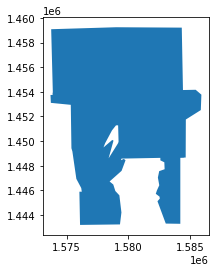

In [133]:
sa_gdf_all[sa_gdf_all.wdID=='WD2020-0383'].plot()

toCheckIDs = ['WD2018-0659', 'WD2019-0624', 'WD2019-0327', 'WD2021-0117', 'WD2021-0569', 'WD2020-0220', 'WD2017-0074']

wdIDs = [wid for wid in toCheckIDs if wid in wd_all.wetdet_delin_number.unique()]

wdIDs

wd_all[wd_all.wetdet_delin_number.isin(wdIDs)][['wetdet_delin_number', 'SetID']]

mappedIDs = [wid for wid in toCheckIDs if wid in sa_gdf_all.wdID.unique()]

mappedIDs

sa_gdf_all[sa_gdf_all.wdID=='WD2021-0495']

sa_gdf_all[sa_gdf_all.wdID=='WD2017-0074'].plot()

In [6]:
wdID = 'WD2011-0335'

In [32]:
wd.columns

Index(['wetdet_delin_number', 'trsqq', 'parcel_id', 'address_location_desc',
       'city', 'county', 'site_name', 'site_desc', 'latitude', 'longitude',
       'Coord-Source', 'DocumentName', 'DecisionLink', 'is_batch_file',
       'status_name', 'received_date', 'response_date',
       'reissuance_response_date', 'project_id', 'site_id', 'record_ID',
       'notes', 'recyear', 'IDyear', 'missinglot'],
      dtype='object')

In [10]:
wd[(wd.status_name.isin(["Withdrawn by DSL", "Withdrawn by Applicant"])) & (wd.is_batch_file=='Y')][["wetdet_delin_number", "status_name", "is_batch_file"]]

,wetdet_delin_number,status_name,is_batch_file
83,WD2009-0368,Withdrawn by DSL,Y


In [98]:
url = wd.loc[wd.wetdet_delin_number == 'WD2018-0281', 'DecisionLink'].values[0]
if str(url) == 'nan':
    print('Decision link is not available')
else:
    webbrowser.open(url)

In [8]:
wdID = 'WD2008-0358'

In [7]:
url = wd.loc[wd.wetdet_delin_number == wdID, 'DecisionLink'].values[0]
extract_page_from_docLink(url=url, pageNm=13, wdID=wdID)

In [120]:
wd.loc[wd.wetdet_delin_number.isin(['WD2022-0430', 'WD2022-0431']), ['latitude', 'longitude']]

,latitude,longitude
29,44.115705,-123.181328
293,44.115705,-123.181328


In [62]:
wd.loc[wd.wetdet_delin_number == 'WD2022-0431', ['Coord-Source', 'status_name']]

,Coord-Source,status_name
29,DSL Verified,Approved


In [86]:
wd[wd.wetdet_delin_number == wdID]['DecisionLink']

547    https://docs.dsl.state.or.us/PublicReview/Elec...
Name: DecisionLink, dtype: object

In [8]:
wd.loc[wd.wetdet_delin_number == wdID, ['longitude', 'latitude']]

,longitude,latitude
352,-123.088023,44.677806
353,-123.086747,44.680010


In [24]:
lon=-123.19532451319888
lat=44.84335117060216
get_point_from_lonlat(lon=lon, lat=lat)

,Longitude,Latitude,geometry
0,-123.195325,44.843351,POINT (613455.107 1139013.871)


In [139]:
wdID = 'WD2012-0112'

In [93]:
wdID

'WD2016-0031'

In [95]:
wd[wd.wetdet_delin_number == wdID]

,wetdet_delin_number,trsqq,parcel_id,address_location_desc,city,county,site_name,site_desc,latitude,longitude,...,response_date,reissuance_response_date,project_id,site_id,record_ID,notes,recyear,IDyear,missinglot,SetID
413,WD2016-0031,17S12E36,"100,300,400,502,600, All part",SW OF INTERSECTION BETWEEN NEFF RD AND ERICKSO...,BEND,Deschutes,COLLIER EXPANSION 17S12E36,WD2016-0031 SOLAR POWER GENERATION,44.06464,-121.229317,...,3/16/2016,NaN,NaN,97856,5386,Partial,2016,2016,N,7


In [10]:
wdID

'WD2008-0358'

In [86]:
wd[wd.wetdet_delin_number == wdID]

,wetdet_delin_number,trsqq,parcel_id,address_location_desc,city,county,site_name,site_desc,latitude,longitude,...,received_date,response_date,reissuance_response_date,project_id,site_id,record_ID,notes,recyear,IDyear,missinglot
0,WD2008-0229,38S21E00,602,"Warner Canyon Ski Area, Lakeview OR",Lakeview,Lake,38S21E00,WD2008-0229 Warner Canyon Waterworks (s30),42.24389,-120.286,...,2008-04-03,2008-05-09,NaT,NaN,64004,5403,,2008,2008,N


In [140]:
lon=wd.loc[wd.wetdet_delin_number == wdID, 'longitude'].values[0]
lat=wd.loc[wd.wetdet_delin_number == wdID, 'latitude'].values[0]
pnt = get_point_from_lonlat(lon=lon, lat=lat)
print(pnt)

   Longitude  Latitude                        geometry
0  -122.4697   44.8004  POINT (801186.301 1118015.525)


In [33]:
unmapped_notes = pd.read_excel(f'{inpath}\\notes\\LCOGUnmappedRecordsJB.xlsx', skiprows=1)

In [179]:
unmapped_notes[unmapped_notes.wetdet_delin_number == wdID][['wetdet_delin_number', 'issue', 'JB Notes']].values

array([['WD2017-0050',
        'georeferencing will take some time; pages from 7 to 21',
        'There are six study areas']], dtype=object)

In [75]:
Lake_taxlot = combine_taxlot(yearstart=2011, yearend=2017, all_counties=False, counties=['Lake'])

2011
2012
2013
2014
2015
2016


In [13]:
Marion_taxlot = combine_taxlot(yearstart=2009, yearend=2017, skips=[2010, 2013], all_counties=False, counties=['Marion'])

2009
2011
2012
2014
2015
2016


In [17]:
Marion_taxlot.head()

,year,county,ORTaxlot,geometry
0,2009.0,Marion,2404.00S01.00E06BB--000000100,"MULTIPOLYGON (((735836.692 1287081.564, 735787..."
1,2009.0,Marion,2404.00S01.00E06BB--000000200,"MULTIPOLYGON (((735495.165 1287090.969, 735494..."
2,2009.0,Marion,2404.00S01.00E06BB--000000300,"MULTIPOLYGON (((735190.322 1287099.250, 735186..."
3,2009.0,Marion,2404.00S01.00E06BB--000000500,"MULTIPOLYGON (((735165.666 1286799.253, 735165..."
4,2009.0,Marion,2404.00S01.00W0300--000001300,"MULTIPOLYGON (((722277.183 1282832.592, 722268..."


In [141]:
t = '09S03E08'
ct_nm = 'Marion'

In [101]:
t in trsqq

True

In [15]:
mpidx = create_ORMapNm(ct_nm=ct_nm, trsqq=t)
print(mpidx)

2408.00S03.00W13BA--0000


In [95]:
mpidx in all_mpidx

True

In [142]:
txlot = create_ORTaxlot(cnt_code=cnt_dict[ct_nm], trsqq=t, lot='500')
print(txlot)

2409.00S03.00E0800--000000500


In [143]:
#txlot in all_txid
#txlot in Lake_taxlot.ORTaxlot.unique()
txlot in Marion_taxlot.ORTaxlot.unique()

True

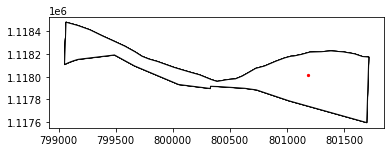

In [144]:
#poly = Lake_taxlot[Lake_taxlot.ORTaxlot==txlot]
poly = Marion_taxlot[Marion_taxlot.ORTaxlot==txlot]
base = poly.plot(color='white', edgecolor='black')
pnt.plot(ax=base, marker='o', color='red', markersize=5);

In [7]:
convert_trsqq('02N010E30')

'02.00N10.00E3000'

In [87]:
wdID = 'WD2016-0175'
url = wd.loc[wd.wetdet_delin_number == wdID, 'DecisionLink'].values[0]
#print(url)
o = 2
for i in range(13, 19):
    if o==0:
        extract_page_from_docLink(url=url, pageNm=i, wdID=wdID)
    elif o==1:
        extract_page_from_locPath(filePath=pdf_path+f'\\docs\\{wdID}_10_14.pdf', 
                              pageNm=i, wdID=wdID)
    else:
        extract_page_from_locPath(filePath=f'C:/Users/clid1852/Downloads/{wdID}final.pdf', 
                                  pageNm=i, wdID=wdID)
    print(i)

13
14
15
16
17
18


In [95]:
url

'https://docs.dsl.state.or.us/PublicReview/ElectronicFile.aspx?docid=3643703&dbid=0'

In [8]:
#wdID = 'WD2019-0320'
extract_page_from_locPath(filePath=f'{pdf_path}\\docs\\WD20200012 AgencyDecision.pdf', 
                          pageNm=4, wdID=wdID)

In [13]:
#wdID = 'WD2022-0694'
extract_page_from_locPath(filePath=f'C:/Users/clid1852/Downloads/WD20200212 Request.pdf', 
                          pageNm=3, wdID=wdID)

In [22]:
wdID = 'WD2017-0050'
extract_page_from_locPath(filePath=pdf_outpath+'\\WD2017-0050_7_21.pdf', 
                          pageNm=0, wdID=wdID)

In [57]:
wdID = 'WD2017-0381'
pages = '7_8'
for i in range(1, 3):
    filePath = pdf_outpath + f'\\{wdID}_{pages}.pdf'
    extract_page_from_locPath(filePath, i, wdID, k=7) 

In [199]:
# A - lon=-122.780067, lat=45.300856
# F - lon=-122.829843, lat=45.496684
# WTP - lon=-122.808718, lat=45.363563
# C - lon=-122.878706, lat=45.431823
# E - lon=-122.901504, lat=45.525420
# B - lon=-122.893679, lat=45.467799
pnt = get_point_from_lonlat(lon=-122.893679, lat=45.467799, transprj=True, export=True)